In [9]:

#importing libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt


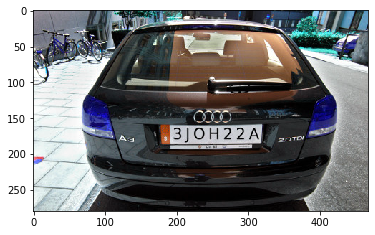

191 159 130 28


In [10]:

#reading the image
img=cv2.imread(r"C:\Users\INDIA\Downloads\opencv-master\opencv-master\samples\data\car_1.jpg")
#cv2.imshow('Image',img)
plt.imshow(img)
plt.show()
img_copy=np.copy(img)
#converting to gray
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#cv2.imshow('Gray',gray)

#reducing noises in the image by smoothing the image
blur=cv2.bilateralFilter(gray,11,90,90)
#cv2.imshow('Blur',blur)

#edge detection using Canny Edge Detection

canny_image=cv2.Canny(blur,50,150)
cv2.imshow('Canny Image',canny_image)

#finding contours in the canny_image
edges=np.copy(canny_image)
_,contours,hierarchy=cv2.findContours(edges,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

#drawing the contours in the original image
cv2.drawContours(img,contours,-1,(255,0,0),2)
cv2.imshow('Image with contours',img)

#sort the contours on the basis of area in decreasing order and some of them, say 25
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:30]

#iterate over the contours to find out the plate
plate=None

for contour in contours:
    #finding the perimeter of the contour which is constrained to be close
    arc_length=cv2.arcLength(contour,True)
    
    #we identify the shape of the contour on the basis on the number of count  
    #and for licence plate the number of edges should be 4
    edges_count=cv2.approxPolyDP(contour,0.02*arc_length,True)
    
    if len(edges_count) ==4:
        if arc_length>300:
            #drawing rectangle over the contour
            x,y,w,h=cv2.boundingRect(contour)
            if (x>15) :
                plate=img_copy[y:y+h,x:x+w]
                print(x,y,w,h)
                break
    
cv2.imshow('Plate',plate)

#saving this image as output image
cv2.imwrite("car_plate.png",plate)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [11]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

text=pytesseract.image_to_string(plate,lang="eng")
print(text)

3JOH22A
